In this notebook, I explore some of the competition's data. Let's get started!

In [43]:
import pandas as pd
from pathlib import Path
import missingno as msno
import pandas_profiling as pdp
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
sns.set(font_scale=1.5)

In [2]:
INPUT_FOLDER = "data/"

In [74]:
train_path = Path(INPUT_FOLDER).joinpath('train.csv')
test_path = Path(INPUT_FOLDER).joinpath('test.csv')

In [75]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [8]:
train_df.shape

(201917, 6)

In [76]:
test_df.shape

(123623, 5)

In [9]:
train_df.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

In [78]:
test_df.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3'], dtype='object')

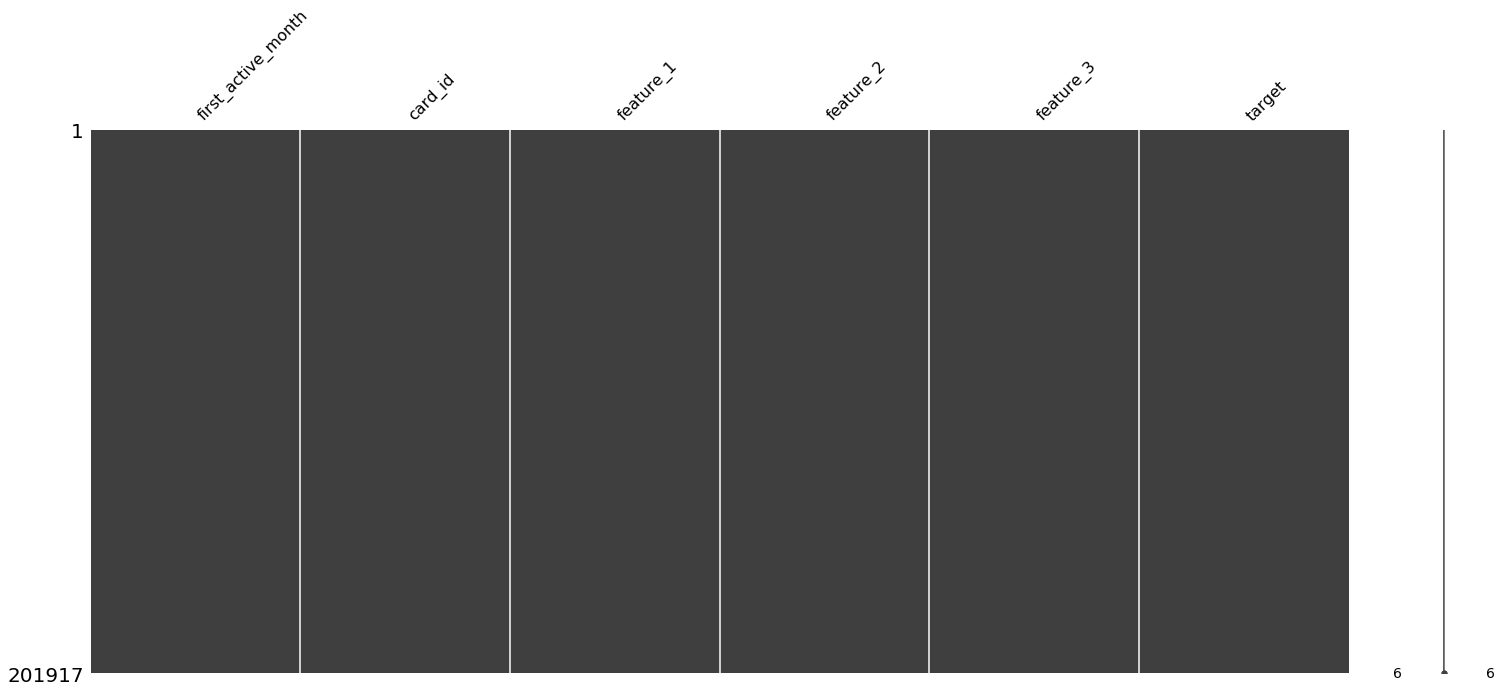

In [11]:
msno.matrix(train_df)

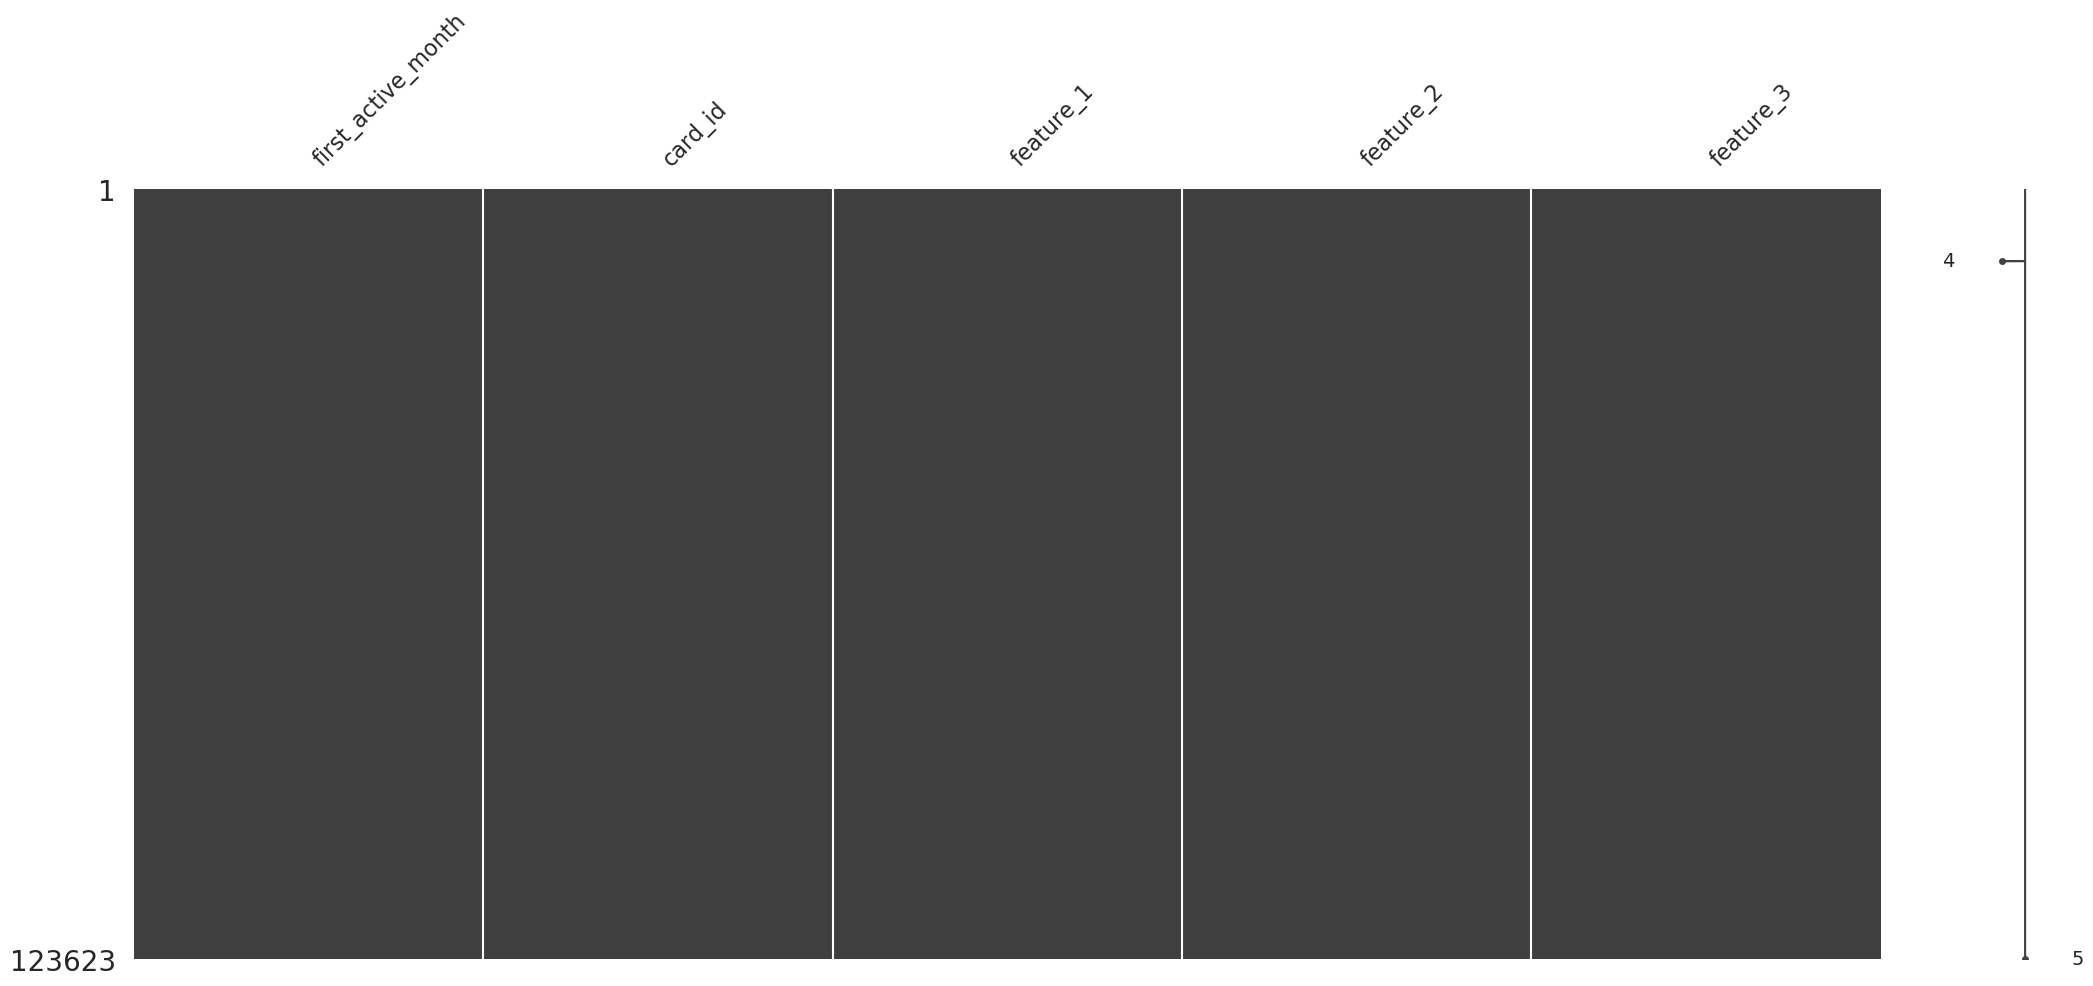

In [79]:
msno.matrix(test_df)

=> No missing data for either training nor test, which is a good thing!

In [80]:
train_profile_report = pdp.ProfileReport(train_df)
test_profile_report = pdp.ProfileReport(test_df)

In [81]:
train_profile_report.to_file('train_profile_report.html')
test_profile_report.to_file('test_profile_report.html')

# Card_id exploration

In [22]:
train_df['card_id'].nunique()

201917

In [23]:
len(train_df['card_id'])

201917

=> Appears to be an ID and not useful to predict. Unless some values are common with the test?

In [85]:
set(test_df.card_id.unique()) & set(train_df.card_id.unique())

set()

Feature 1 and feature 2 are categorical features with 5 and 3 distinct values. 
Feature 3 is a boolean one

# First active month

In [27]:
train_df['first_active_month'].nunique()

75

In [28]:
len(train_df['first_active_month'])

201917

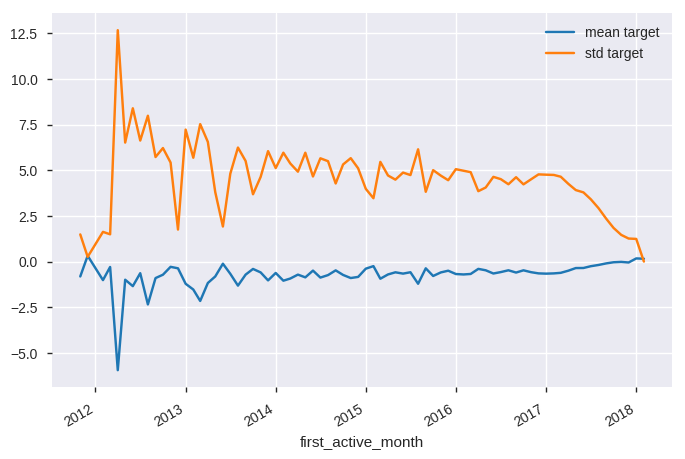

In [40]:
(train_df.assign(first_active_month=lambda df: pd.to_datetime(df["first_active_month"]))
         .groupby('first_active_month').target
         .agg(['mean', lambda g: np.where(len(g) > 1, g.std(), 0)])
         .rename(columns={"mean": "mean target", "<lambda>": "std target"})
         .plot())

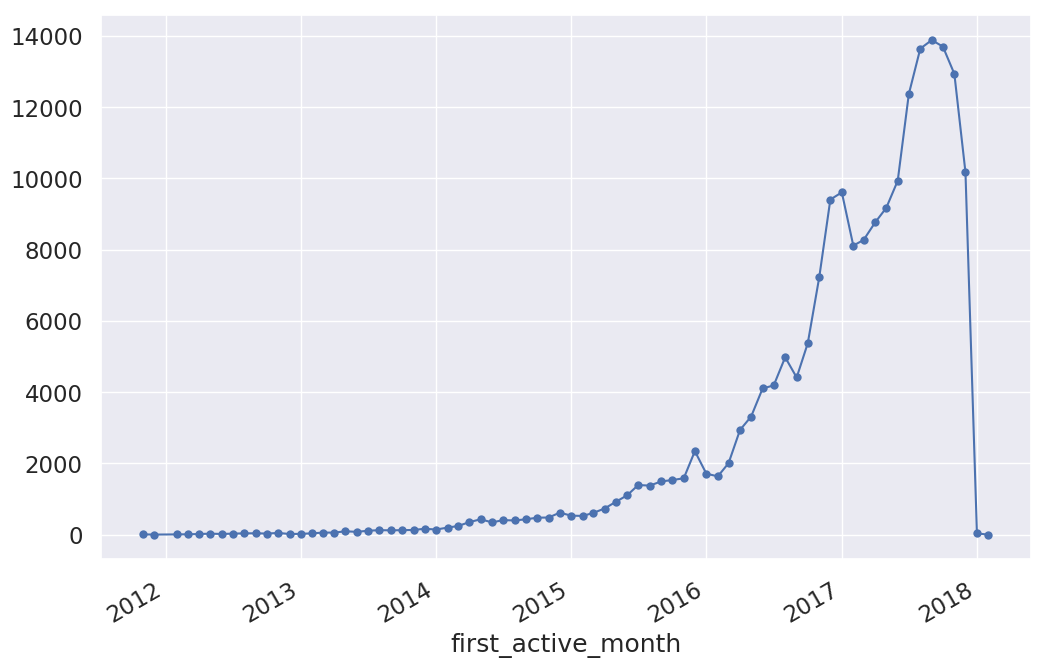

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

(train_df.assign(first_active_month=lambda df: pd.to_datetime(df["first_active_month"]))
         .groupby('first_active_month')
         .target
         .count()
         .plot(style='o-', ax=ax))

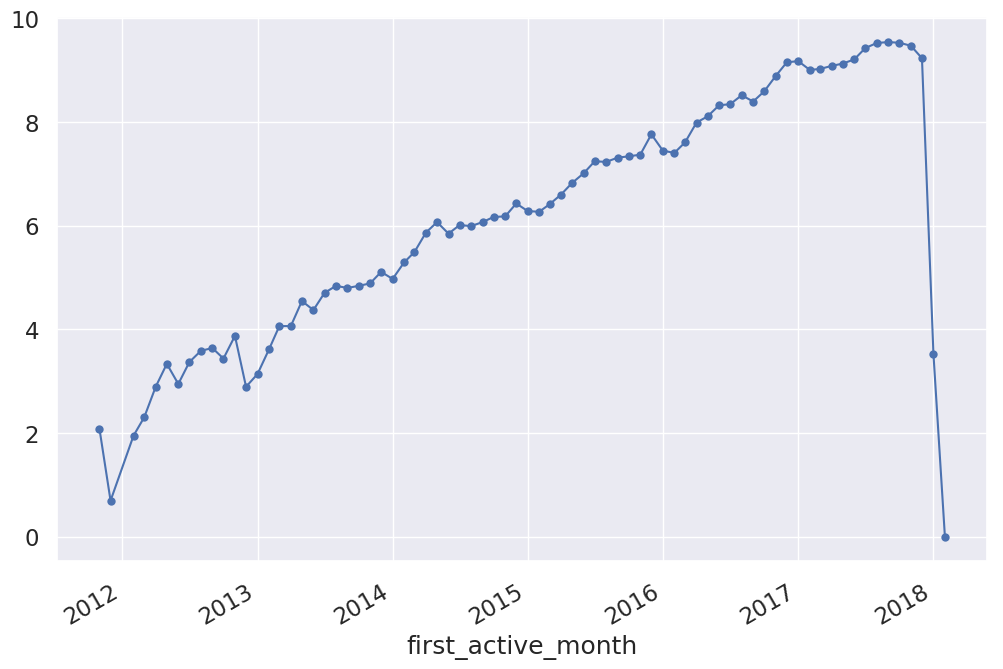

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

(train_df.assign(first_active_month=lambda df: pd.to_datetime(df["first_active_month"]))
         .groupby('first_active_month')
         .target
         .agg(lambda g: np.log(g.count()))
         .plot(style='o-', ax=ax))

In [73]:
# TODO: Make this importable
# Finish this
# from elo_merchant_category_recommendation.benchmark import linear_benchmark